In [34]:
import os, sys
my_path = os.getcwd()+"/.."
print(my_path)
sys.path.append(my_path)

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from ensembler.potentials.OneD import fourWellPot, harmonicOscillator
from ensembler.potentials.biasOneD import addedPotentials
from ensembler.integrator.stochastic import langevinIntegrator
#from ensembler.integrator.newtonian import positionVerletIntegrator, velocityVerletIntegrator, leapFrogIntegrator
#from ensembler.integrator.stochastic import monteCarloIntegrator, metropolisMonteCarloIntegrator, langevinIntegrator, langevinVelocityIntegrator
from ensembler.system import system

##Visualisation
from ensembler.visualisation.plotSimulations import static_sim_plots, static_sim_plots_bias

/Users/stlinker/Desktop/phD/Riniker/Github/Ensembler/examples/..


# Executing Simulations

## Original System

In [22]:
#Simple Langevin integration simulation:
#Thermostat is already included (Langevin thermostat)
#settings
sim_steps = 5000
x_min, x_max = (-10, 10)

#Simulation Setup
pot=fourWellPot(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
integrator = langevinIntegrator(dt=0.1, gamma=15)
sys=system(potential=pot, integrator=integrator,  position=2,  temperature=3)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

initializing Langevin old Positions	 



Trajectory length:  5001

last_state:  State(position=4.329214875777261, temperature=3, totEnergy=0.43117060597029205, totPotEnergy=0.43117060597029205, totKinEnergy=nan, dhdpos=-3.1710462693237456, velocity=None)
5001


,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,2.000000,3.0,8.366951,8.359103,0.007848,1.039056,-0.125282
1,1.822630,3.0,8.139800,8.139800,NaN,-1.039056,NaN
2,1.579242,3.0,7.941207,7.941207,NaN,-1.244958,NaN
3,1.366051,3.0,8.042672,8.042672,NaN,-0.218755,NaN
4,1.504976,3.0,7.942028,7.942028,NaN,1.216554,NaN


{'bodies': [<matplotlib.collections.PolyCollection object at 0x12499a9e8>]}


(None, <Figure size 1152x288 with 3 Axes>)

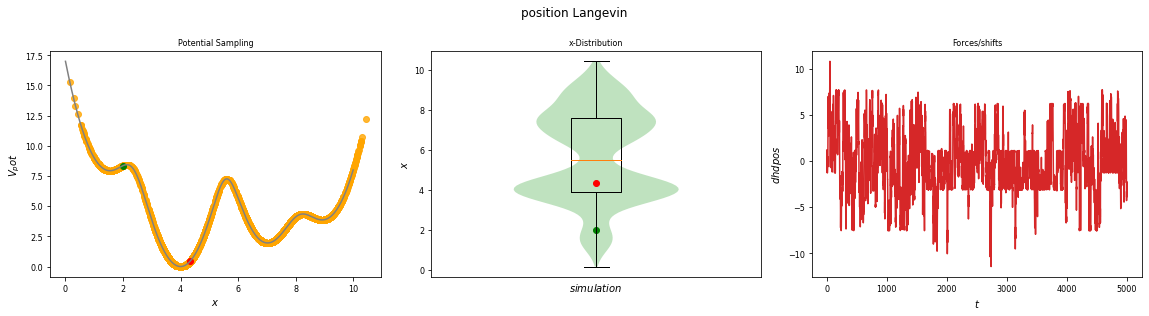

In [23]:
#plot
static_sim_plots(sys, title="position Langevin", x_range=list(range(0,10)))

# Enhaced sampling

# Time independent bias

## Umbrella sampling

In [32]:
sim_steps = 1000
x_min, x_max = (-10, 10)

#Simulation Setup
origpot=fourWellPot(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
biaspot = harmonicOscillator(k=10, x_shift=5) 
#Add the bias and the original system
totpot = addedPotentials(origpot, biaspot)

integrator = langevinIntegrator(dt=0.1, gamma=15)

sys=system(potential=totpot, integrator=integrator,  position=5,  temperature=3)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()


initializing Langevin old Positions	 



Trajectory length:  1001

last_state:  State(position=3.6811116157582857, temperature=3, totEnergy=9.098903834955165, totPotEnergy=9.098903834955165, totKinEnergy=nan, dhdpos=9.442169641936417, velocity=None)
1001


,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,5.000000,3.0,3.899339,3.880991,0.018348,7.296538,-0.191562
1,4.840023,3.0,2.904511,2.904511,NaN,-7.296538,NaN
2,4.597105,3.0,2.226952,2.226952,NaN,-4.846127,NaN
3,4.614830,3.0,2.241835,2.241835,NaN,-0.683710,NaN
4,4.646064,3.0,2.281487,2.281487,NaN,-0.995529,NaN


{'bodies': [<matplotlib.collections.PolyCollection object at 0x11d408d68>]}


(None, <Figure size 1152x288 with 3 Axes>)

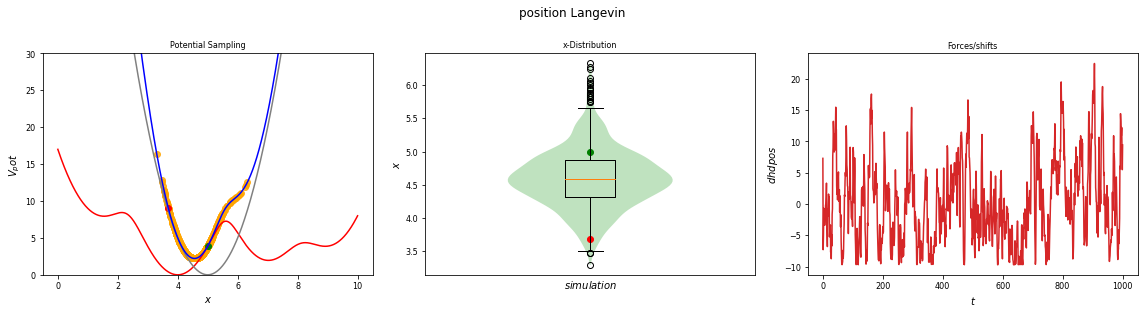

In [33]:
#plot
static_sim_plots_bias(sys, title="position Langevin", x_range=list(range(0,10)), y_range=[0,30])

## Scaled potential

In [13]:
sim_steps = 5000
x_min, x_max = (-10, 10)

#Simulation Setup
origpot=fourWellPot(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
biaspot = fourWellPot(Vmax=-2.5, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
#Add the bias and the original system
totpot = addedPotentials(origpot, biaspot)

integrator = langeinIntegrator(dt=0.1, gamma=15)

sys=system(potential=totpot, integrator=integrator,  position=5,  temperature=3)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=False)

print("Trajectory length: ",len(sys.trajectory))
print()
print("last_state: ", cur_state)
print(len(sys.trajectory))
sys.trajectory.head()

initializing Langevin old Positions	 



Trajectory length:  5001

last_state:  State(position=7.4491543162912475, temperature=3, totEnergy=0.95534376304824, totPotEnergy=0.95534376304824, totKinEnergy=nan, dhdpos=-0.9065590328179851, velocity=None)
5001


,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,5.000000,3.0,1.462163,1.455372,0.006791,2.736202,-0.116544
1,5.164013,3.0,1.915851,1.915851,NaN,-2.736202,NaN
2,5.092392,3.0,1.713129,1.713129,NaN,-2.819292,NaN
3,5.025675,3.0,1.526080,1.526080,NaN,-2.827697,NaN
4,4.978290,3.0,1.396328,1.396328,NaN,-2.770782,NaN


{'bodies': [<matplotlib.collections.PolyCollection object at 0x11a6eb710>]}


(None, <Figure size 1152x288 with 3 Axes>)

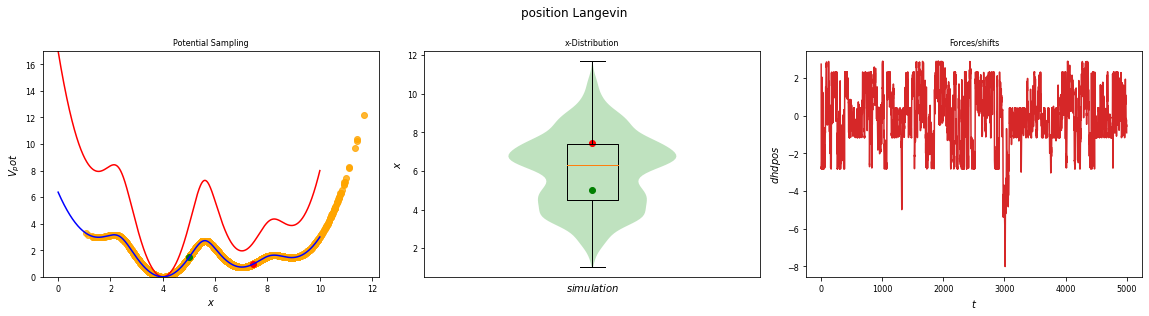

In [14]:
#plot
static_sim_plots_bias(sys, title="position Langevin", x_range=list(range(0,10)), y_range=[0,17])

# Time dependent bias